# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
# Trecho de importações
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# Trecho de leitura dos arquivos a serem utilizados
X_treino = pd.read_csv('X_treino.csv', index_col = [0, 1])
X_teste = pd.read_csv('X_teste.csv', index_col = [0, 1])
y_treino = pd.read_csv('y_treino.csv', index_col=[0])
y_teste = pd.read_csv('y_teste.csv', index_col=[0])

# Impressão dos formatos dos conjuntos
print("Tamanho de X_treino:", X_treino.shape)
print("Tamanho de X_teste:", X_teste.shape)
print("Tamanho de y_treino:", y_treino.shape)
print("Tamanho de y_teste:", y_teste.shape)

Tamanho de X_treino: (7352, 561)
Tamanho de X_teste: (2947, 561)
Tamanho de y_treino: (7352, 1)
Tamanho de y_teste: (2947, 1)


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [2]:
# Extraindo conjuntos de validação de dentro dos treinamentos
X_train, X_validacao, y_train, y_val = train_test_split(X_treino, y_treino, test_size = 0.25, random_state = 42)

# Impressão dos formatos dos conjuntos
print("Tamanho de X_treino:", X_train.shape)
print("Tamanho de X_validacao:", X_validacao.shape)
print("Tamanho de y_treino:", y_train.shape)
print("Tamanho de y_validacao:", y_val.shape)

Tamanho de X_treino: (5514, 561)
Tamanho de X_validacao: (1838, 561)
Tamanho de y_treino: (5514, 1)
Tamanho de y_validacao: (1838, 1)


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [3]:
%%time

clf = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)
importances = clf.feature_importances_

sorted_indices = np.argsort(importances)
features = np.array(X_train.columns)[[sorted_indices[-3:]]]

features

Wall time: 1.53 s


array(['560 angle(Y,gravityMean)', '382 fBodyAccJerk-bandsEnergy()-1,8',
       '53 tGravityAcc-min()-X'], dtype=object)

> **Por que fica mudando o TOP 3 todas as vezes que rodo essa célula? Não deveria ser sempre os 3 mesmos?**

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [4]:
X_train_best = X_train.iloc[:,sorted_indices[-3:]]
X_valid_best = X_validacao.iloc[:,sorted_indices[-3:]]
X_test_best = X_teste.iloc[:,sorted_indices[-3:]]

X_train_best

,,"560 angle(Y,gravityMean)","382 fBodyAccJerk-bandsEnergy()-1,8",53 tGravityAcc-min()-X
,indicador_individuo,,,
6593,28,0.257591,-0.562317,0.909123
3519,17,-0.540630,-0.999995,-0.168695
4376,22,0.217049,-0.999988,0.979529
4294,21,-0.362547,-0.999924,-0.192011
29,1,-0.021567,-0.999995,0.850499
...,...,...,...,...
5191,25,0.159112,-0.939434,0.929265
5226,25,0.106156,-0.824835,0.895652
5390,25,0.183547,-0.954805,0.980335


In [5]:
%%time

path = DecisionTreeClassifier(random_state = 42).cost_complexity_pruning_path(X_train_best, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[::5]

ccp_alphas # Exibindo todos valores

Wall time: 24.5 ms


array([0.00000000e+00, 1.45085238e-04, 1.48382629e-04, 1.51680021e-04,
       1.58686979e-04, 1.63220892e-04, 1.66243501e-04, 1.69266111e-04,
       1.71811466e-04, 1.74846312e-04, 1.76318865e-04, 1.77934725e-04,
       1.79893994e-04, 1.81356547e-04, 1.97843506e-04, 2.04607386e-04,
       2.22161770e-04, 2.37158561e-04, 2.41808729e-04, 2.41808729e-04,
       2.46846411e-04, 2.60493949e-04, 2.71479841e-04, 2.72034820e-04,
       2.82110184e-04, 2.88310408e-04, 2.90170475e-04, 2.90353664e-04,
       3.03124514e-04, 3.10896938e-04, 3.17373957e-04, 3.29032592e-04,
       3.33847177e-04, 3.48647591e-04, 3.62713094e-04, 3.80100293e-04,
       4.11775328e-04, 4.14529250e-04, 4.32773847e-04, 4.55306312e-04,
       4.89662677e-04, 5.33365065e-04, 5.70630992e-04, 6.21793875e-04,
       6.60757248e-04, 7.63146761e-04, 8.39524094e-04, 8.70511425e-04,
       9.37302583e-04, 1.16167919e-03, 1.36460182e-03, 1.57890938e-03,
       2.21225135e-03, 2.89871137e-03, 3.40804409e-03, 9.71672876e-03,
      

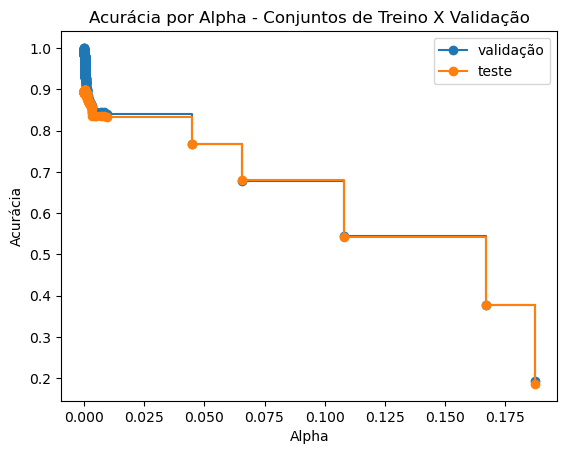

Wall time: 8.4 s


DecisionTreeClassifier(ccp_alpha=0.0003618421726719254, random_state=42)

In [6]:
%%time

path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train_best, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_train_best, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train_best, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid_best, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia por Alpha - Conjuntos de Treino X Validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")

ax.legend()
plt.show()

index_clf = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
best_clf = clfs[index_clf]
best_clf

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [7]:
score = best_clf.score(X_test_best, y_teste)

print(f'Acurácia: {score * 100: .1f} %')

Acurácia:  74.5 %
